In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

years = [2021, 2022, 2023]




# 🔍 2021년 중도탈락 분석 결과


## 🎓 2021 자퇴율 상위/하위 5개 대학


,학교,자퇴율
172,인천가톨릭대학교,9.677419
142,아신대학교,9.103448
68,대구예술대학교,8.088818
182,제주국제대학교,8.058925
11,강서대학교,7.715134


,학교,자퇴율
71,대전가톨릭대학교,0.000000
181,정석대학,0.000000
31,경인교육대학교 _제2캠퍼스,0.293902
215,한국예술종합학교,0.493980
218,한국체육대학교,0.549273


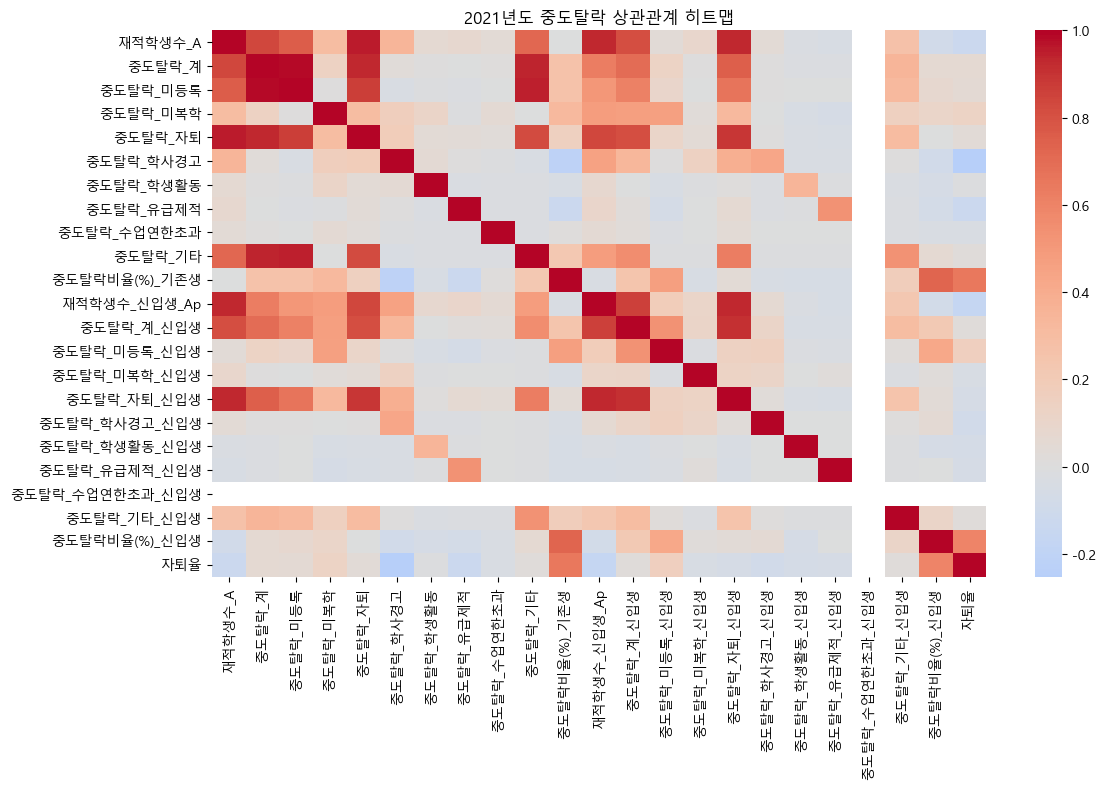

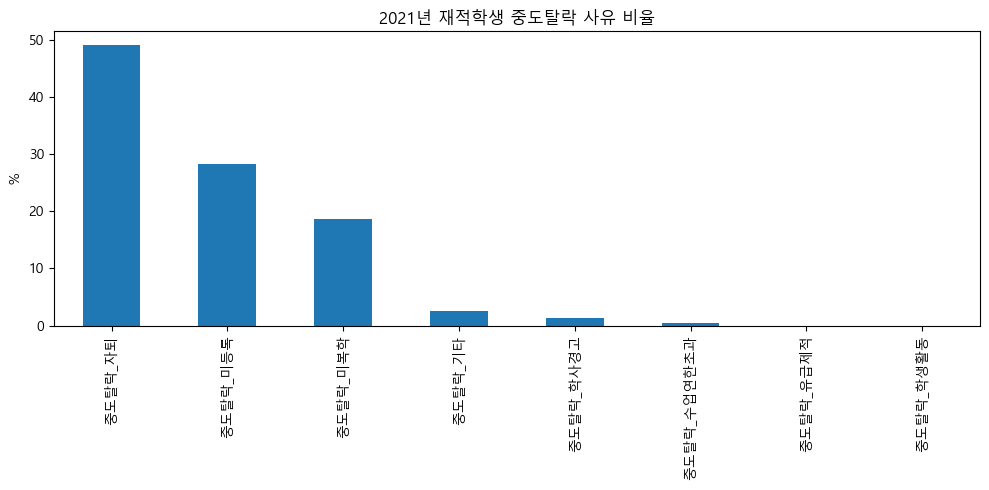

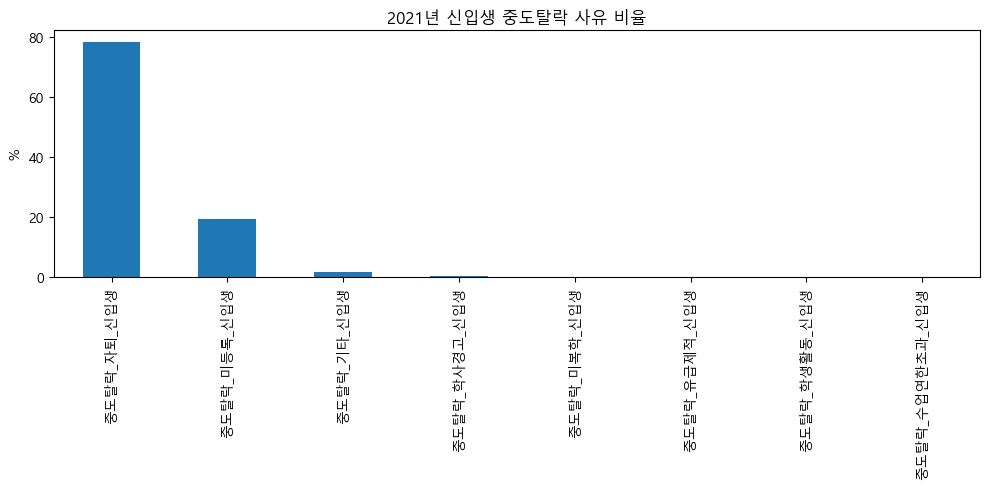



# 🔍 2022년 중도탈락 분석 결과


## 🎓 2022 자퇴율 상위/하위 5개 대학


,학교,자퇴율
134,순복음총회신학교,11.333333
86,루터대학교,9.923664
68,대구예술대학교,9.760956
170,인천가톨릭대학교,9.333333
141,아신대학교,8.900524


,학교,자퇴율
7,감리교신학대학교,0.000000
217,한국전통문화대학교,0.000000
113,서울디지털대학교,0.173693
30,경인교육대학교 _제2캠퍼스,0.306279
166,을지대학교,0.331126


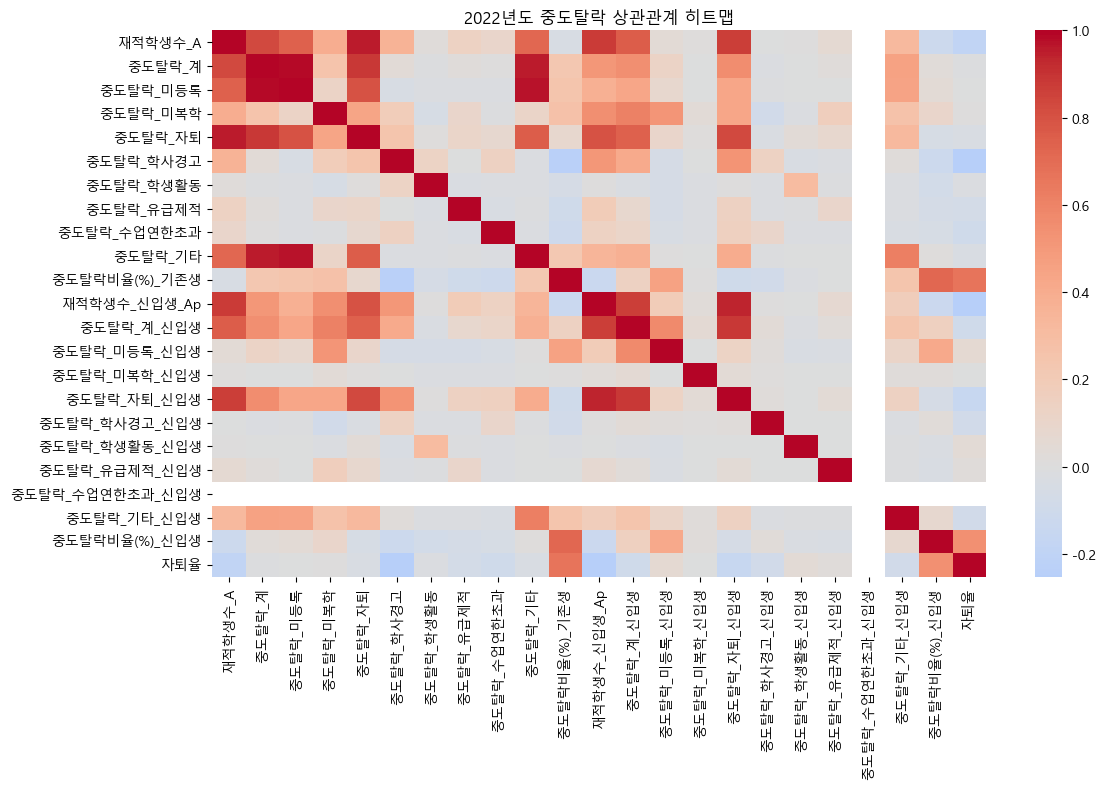

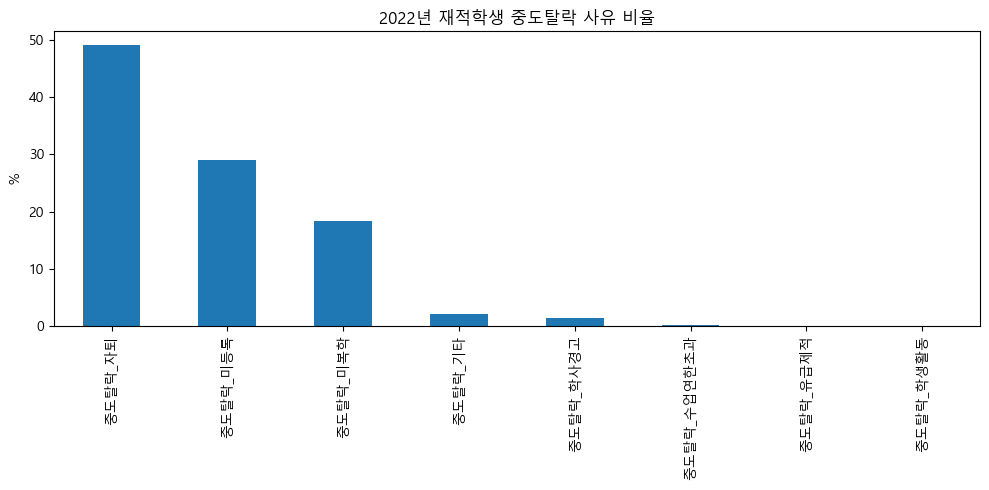

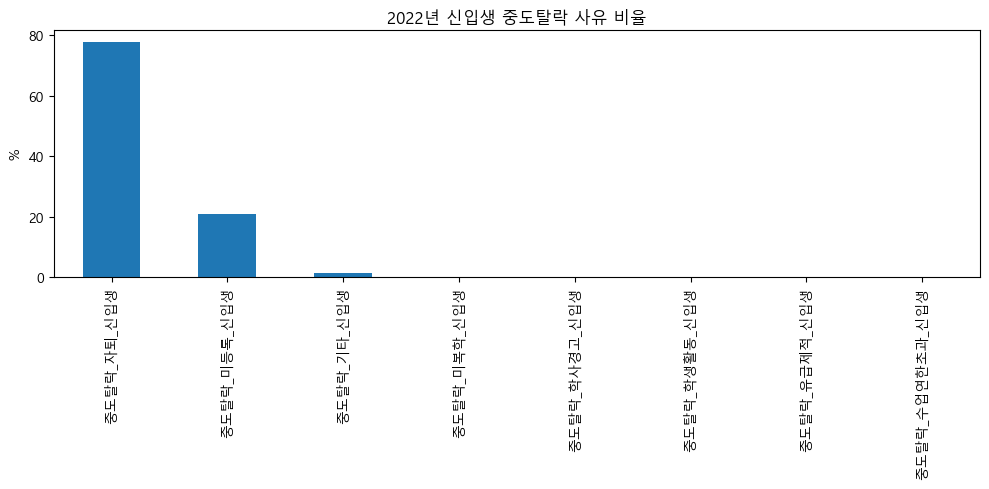



# 🔍 2023년 중도탈락 분석 결과


## 🎓 2023 자퇴율 상위/하위 5개 대학


,학교,자퇴율
207,태재대학교,inf
186,제주국제대학교,14.634146
185,정석대학,13.793103
76,대구예술대학교,13.199426
64,금강대학교,11.498258


,학교,자퇴율
171,을지대학교,0.000000
157,영산선학대학교,0.000000
222,한국체육대학교,0.367647
219,한국예술종합학교,0.666465
28,경인교육대학교 _제2캠퍼스,0.773395


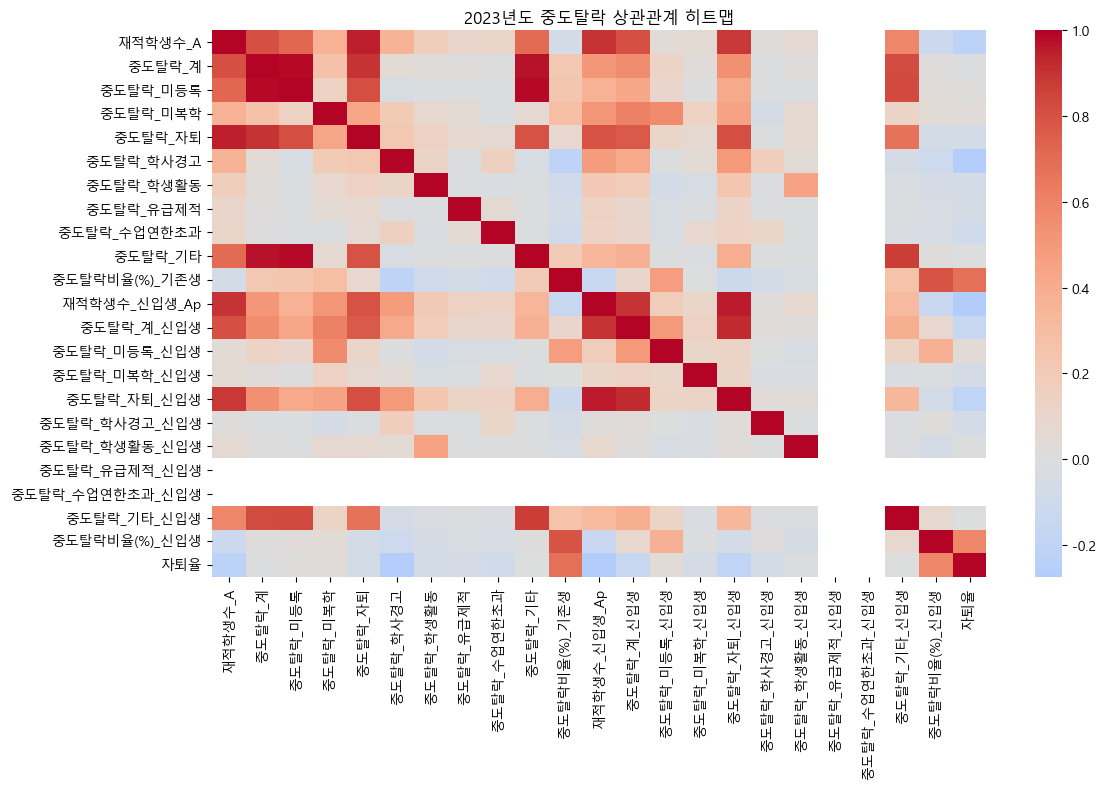

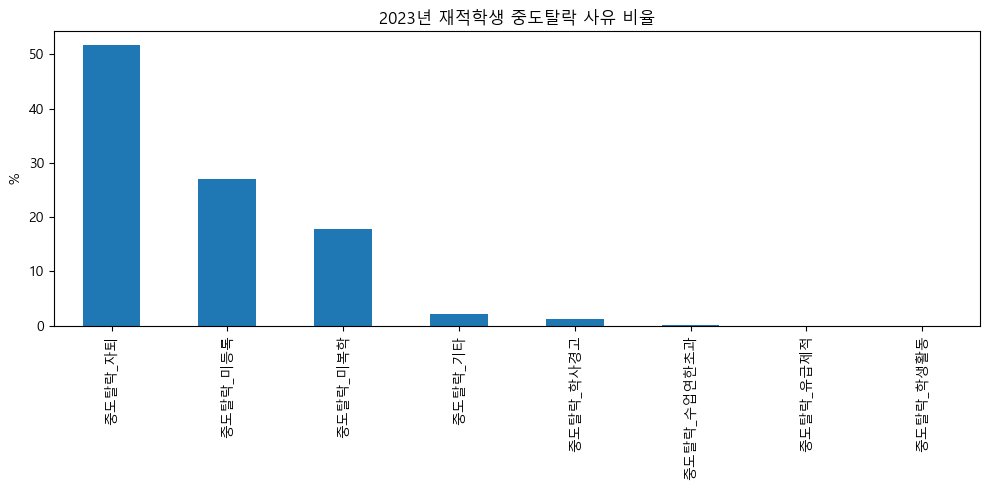

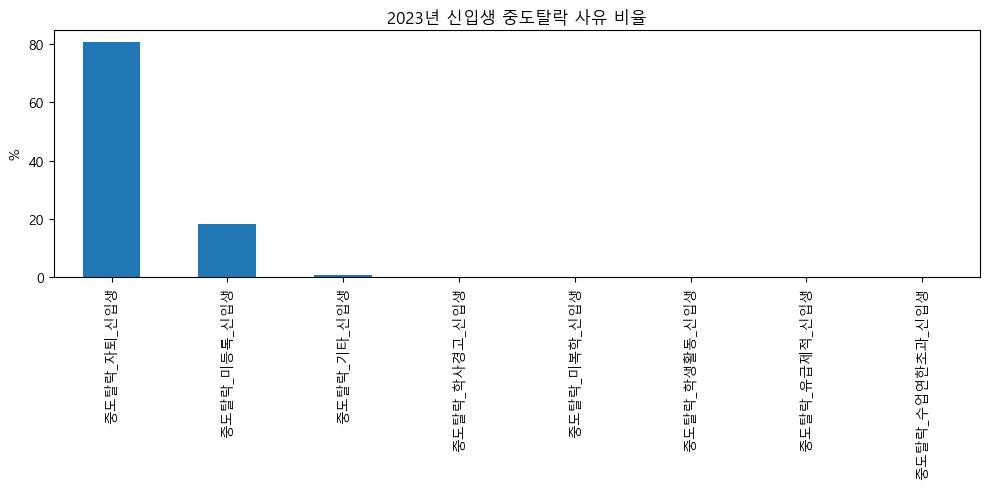

In [4]:
# 컬럼명 정리
new_columns = [
    '기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재적학생수_A', 
    '중도탈락_계', '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고',
    '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타',
    '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap', 
    '중도탈락_계_신입생', '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
    '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생',
    '중도탈락_수업연한초과_신입생', '중도탈락_기타_신입생', '중도탈락비율(%)_신입생'
]

correlation_cols = [
    '재적학생수_A', '중도탈락_계', '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴',
    '중도탈락_학사경고', '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과',
    '중도탈락_기타', '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap', '중도탈락_계_신입생',
    '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
    '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생',
    '중도탈락_수업연한초과_신입생', '중도탈락_기타_신입생', '중도탈락비율(%)_신입생', '자퇴율'
]

for year in years:
    print(f"\n\n# 🔍 {year}년 중도탈락 분석 결과\n")

    input_file = f"data/{year}_중도탈락 학생 현황 (대학).xlsx"
    df = pd.read_excel(input_file)

    # 전처리
    df.columns = new_columns  # new_columns 생략된 부분은 동일하게 설정
    numeric_cols = [col for col in df.columns if '중도탈락' in col or '재적학생수' in col]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(how='all').reset_index(drop=True)
    df['자퇴율'] = df['중도탈락_자퇴'] / df['재적학생수_A'] * 100

    # 자퇴율 Top/Bottom 5
    print(f"\n## 🎓 {year} 자퇴율 상위/하위 5개 대학")
    display(df.sort_values('자퇴율', ascending=False).head(5)[['학교', '자퇴율']])
    display(df.sort_values('자퇴율', ascending=True).head(5)[['학교', '자퇴율']])

    # 상관관계 히트맵
    corr = df[correlation_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title(f'{year}년도 중도탈락 상관관계 히트맵')
    plt.tight_layout()
    plt.show()

    # 사유별 비율 분석 (재적생 / 신입생)
    reason_cols = [
        '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고',
        '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타'
    ]
    total = df['중도탈락_계'].sum()
    reason_ratios = df[reason_cols].sum() / total * 100
    reason_ratios.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
    plt.title(f'{year}년 재적학생 중도탈락 사유 비율')
    plt.ylabel('%')
    plt.tight_layout()
    plt.show()

    new_cols = [col + '_신입생' for col in reason_cols]
    new_total = df['중도탈락_계_신입생'].sum()
    new_ratios = df[new_cols].sum() / new_total * 100
    new_ratios.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
    plt.title(f'{year}년 신입생 중도탈락 사유 비율')
    plt.ylabel('%')
    plt.tight_layout()
    plt.show()
